In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, integrate

In [3]:
from code.series import series_x_mu_b0
from code.series import series_x_mu_b0_pos
from code.series import asymtotic_x_mu_b0_neg
from code.series import asymptotic_alpha_b0

In [251]:
alpha = 0.8
beta = 0
mu = 1.00102
delta = 1.09
x = 0.05

In [252]:
x - mu

-0.95102

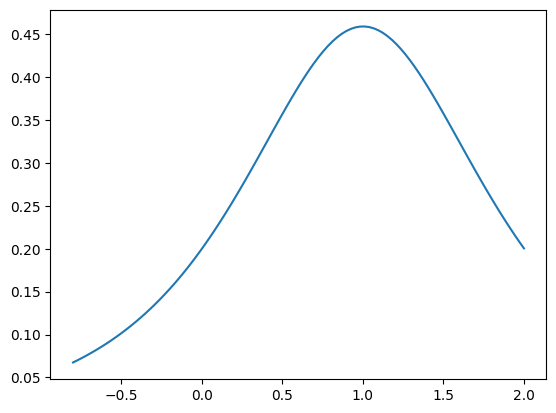

In [254]:
xx = np.linspace(-0.8, 2, 100)
plt.plot(xx, stats.norminvgauss.pdf(xx, a=alpha*delta, b=beta*delta, loc=mu, scale=delta))
plt.show()

In [241]:
stats.norminvgauss.cdf(x, a=alpha*delta, b=beta*delta, loc=mu, scale=delta)

0.1612277927484906

In [242]:
series_x_mu_b0(x, alpha, mu, delta, maxiter=200, eps=1e-14)

(0.1612277927484913, 102)

In [243]:
series_x_mu_b0_pos(x, alpha, mu, delta, maxiter=700, eps=1e-14)

(0.16122779274849386, 37)

In [244]:
1.0 - series_x_mu_b0_pos(-x, alpha, -mu, delta, maxiter=300, eps=1e-14)[0]

0.16122779274849386

In [245]:
# asymptotic_alpha_b0(x, alpha, mu, delta, eps=1e-5)

In [246]:
asymtotic_x_mu_b0_neg(x, alpha, mu, delta, eps=1e-15)

(-1, 200)

In [247]:
from mpmath import *

In [248]:
mp.dps = 50

def fun_k0(t):
    C = sqrt(2) * delta * exp(delta * alpha) / pi
    r = exp(sqrt(2) * (x - mu) * t)
    w = sqrt(2 * ((x - mu) ** 2 + delta ** 2)) * sqrt(alpha ** 2 / 2 + t** 2)
    q = besselk(0, w)
    return C * r * q

quad(fun_k0, [0, inf])

mpf('0.16122779274849252546591527704155454781470414548553755')

In [249]:
mp.dps = 100

def normcdf(x):
    return erfc(-x / sqrt(2)) / 2

def fun_phi(t):
    C = delta / sqrt(2 * pi)
    return C * normcdf((x - mu) / sqrt(t)) * t ** (-3/2) * exp(-(delta - alpha * t) ** 2 / 2 / t)

alpha = mpmathify(alpha)
mu = mpmathify(mu)
delta = mpmathify(delta)
x = mpmathify(x)

quad(fun_phi, [0, inf])

mpf('0.1612277927484925283506798003472249747739502818248743254475337297038245217053015632901415493343072304025')

In [18]:
mp.dps = 100

def fun_k1(t):
    C = alpha * delta / pi
    r = sqrt(delta ** 2 + (t - mu) ** 2)
    return C * besselk(1, alpha * r) / r * exp(delta * alpha)

print(quad(fun_k1, [-inf, x]))

mp.dps = 50

0.000000000002671296348822753608404042605394311922554930937587186352434722231076156654363482158410658748064487048


Expansion

In [ ]:
mp.dps = 50

In [ ]:
b = delta / alpha
a = (x-mu) / sqrt(2)

In [ ]:
y0 = 1/2 * erfc(-a / sqrt(b))
y1 = -1/2 * a * exp(-a**2 / b) / sqrt(pi) / b ** (3/2)

yy = [y0, y1]
N = 10

for n in range(0, N):
    yn = ((n + 1) * yy[n+1] * (2*a**2 - 4*b*n - 3*b) - (2*n**2 + n) * yy[n]) / (2*b**2 * (n+1) * (n+2))
    yy.append(yn)

In [ ]:
z = alpha ** 2 / 2
l = -1/2
xi = b * z

In [ ]:
Q = [2 * xi ** l * besselk(l, 2 * xi), 0, 2 * xi ** (l + 2) * (-besselk(l, 2 * xi) + besselk(l+2, 2 * xi))]

for k in range(1, N):
    qn = (k + l + 1 - 2 * xi) * Q[k+1] + xi * (2 * k + l + 1) * Q[k] + k * xi ** 2 * Q[k-1]
    Q.append(qn)

In [ ]:
s = 0
for k in range(N):
    s += yy[k] * Q[k] / z ** k

s * z **(-l) * delta * exp(delta * alpha) / sqrt(2 * pi)